# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from pycirclize import Circos
from pycirclize.parser import Matrix

import networkx as nx

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import fixedDensity as fd
import chordPlot as cp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Covariance Matrices

In [4]:
# cov_NeuN_dict
with open(os.path.join(layer_CalData, 'cov_NeuN_dict.pkl'), 'rb') as f:
    cov_NeuN_dict = pickle.load(f)
f.close()

# cov_NeuN_dict_w
with open(os.path.join(layer_CalData, 'cov_NeuN_dict_w.pkl'), 'rb') as f:
    cov_NeuN_dict_w = pickle.load(f)
f.close()

## Loading Log %AO Values

In [5]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

# NeuN_TAU
with open(os.path.join(layer_dataDir, 'NeuN_TAU.pkl'), 'rb') as f:
    NeuN_TAU = pickle.load(f)
f.close()

# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

# SMI32_HC
with open(os.path.join(layer_dataDir, 'SMI32_HC.pkl'), 'rb') as f:
    SMI32_HC = pickle.load(f)
f.close()

# SMI32_TAU
with open(os.path.join(layer_dataDir, 'SMI32_TAU.pkl'), 'rb') as f:
    SMI32_TAU = pickle.load(f)
f.close()

# SMI32_TDP
with open(os.path.join(layer_dataDir, 'SMI32_TDP.pkl'), 'rb') as f:
    SMI32_TDP = pickle.load(f)
f.close()

## Loading Layer Neuron Labels (NeuN)

In [6]:
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)', 'L23_4(Rectus)', 'L23_5(Middle Frontal)', 
               'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)', 'L56_4(Rectus)', 'L56_5(Middle Frontal)']

# Draw Graph Networks (NeuN)

## Define Variables

### Set fixed density value 

In [7]:
fd_val = 10

### Label Order

In [8]:
order = ['L23_5(Middle Frontal)',
         'L23_4(Rectus)',
         'L23_3v(Paracingulate)', 
         'L23_3d(Paracingulate)',
         'L23_2(Cingulate)',
         'L23_1(Cingulate)',
         'L56_1(Cingulate)',
         'L56_2(Cingulate)',
         'L56_3d(Paracingulate)',
         'L56_3v(Paracingulate)', 
         'L56_4(Rectus)',
         'L56_5(Middle Frontal)']

### Dataset to Use

In [9]:
# Variable setting
neuron_type = "NeuN"
val_type = 'Original'
cov_dict = cov_NeuN_dict
data_label = NeuN_Labels

In [10]:
# Set Node Sizes based on Log %AO values
HC_exp = NeuN_HC.copy()
TAU_exp = NeuN_TAU.copy()
TDP_exp = NeuN_TDP.copy()

# Get min/max %AO of LBD
minVal = np.nanmin(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())))
maxVal = np.nanmax(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())) - minVal + 0.0015, axis=0)

scale = 700

# Apply a transformation to create a more dramatic difference in node sizes
def transform_values(values, min_val, max_val, scale):
    # Normalize the values
    normalized = (values - min_val) / max_val
    # Apply an exponential transformation
    transformed = np.exp(normalized) - 1  # subtracting 1 to bring the minimum back to 0
    # Scale the transformed values
    return scale * transformed

# Size of Nodes
markerVecHC = np.nanmean(HC_exp, axis=0)
markerVecHC = transform_values(markerVecHC, minVal, maxVal, scale)

markerVecTAU = np.nanmean(TAU_exp, axis=0)
markerVecTAU = transform_values(markerVecTAU, minVal, maxVal, scale)

markerVecTDP = np.nanmean(TDP_exp, axis=0)
markerVecTDP = transform_values(markerVecTDP, minVal, maxVal, scale)

## HC

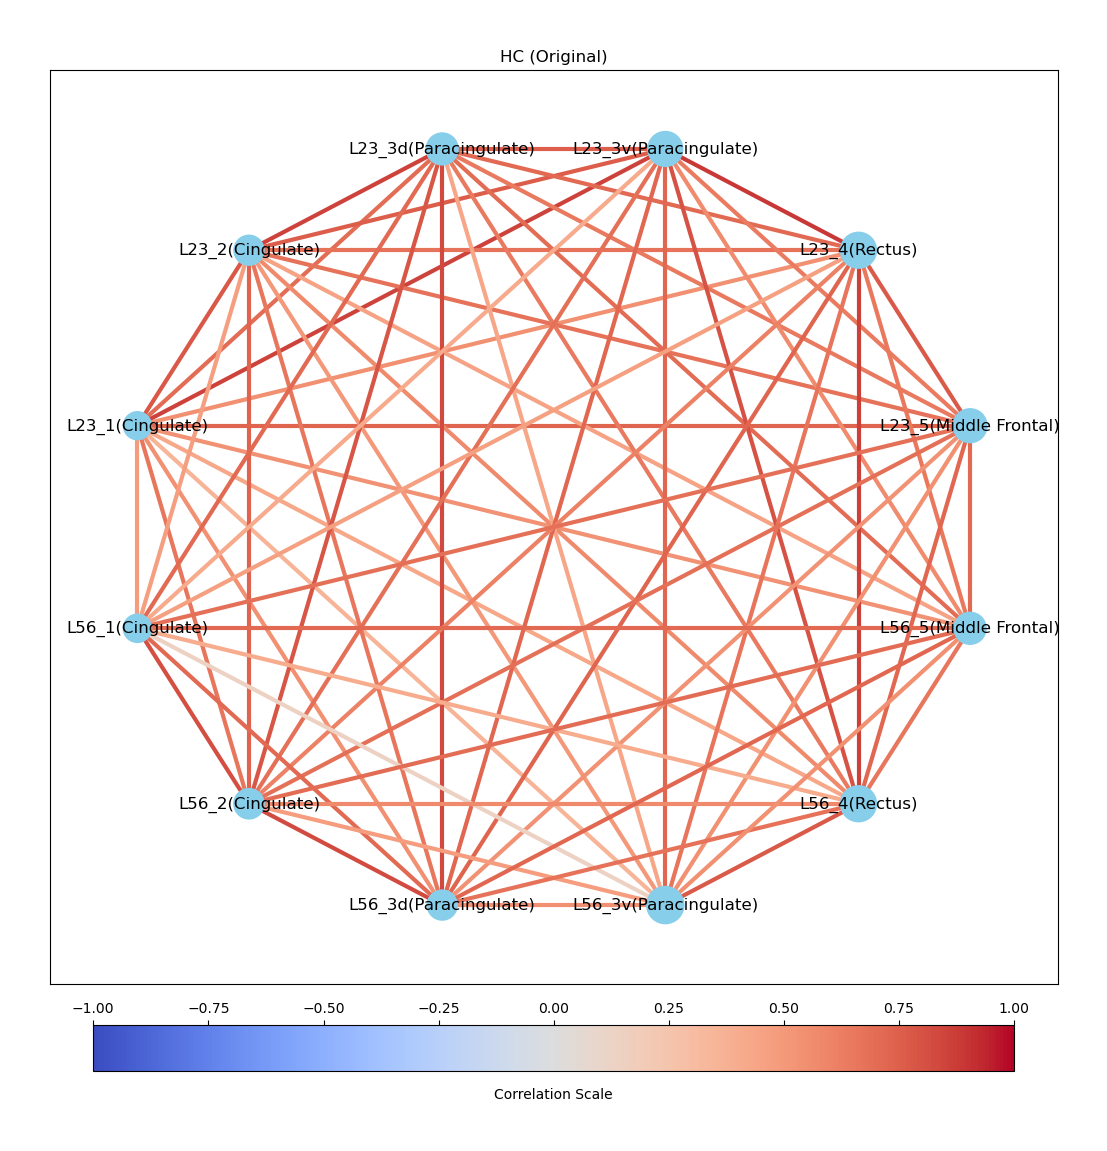

In [11]:
figHC = cp.chordPlot(cov_dict['HC'], data_label, f'HC ({val_type})', fig_type='org', markerVec=markerVecHC)

## TAU

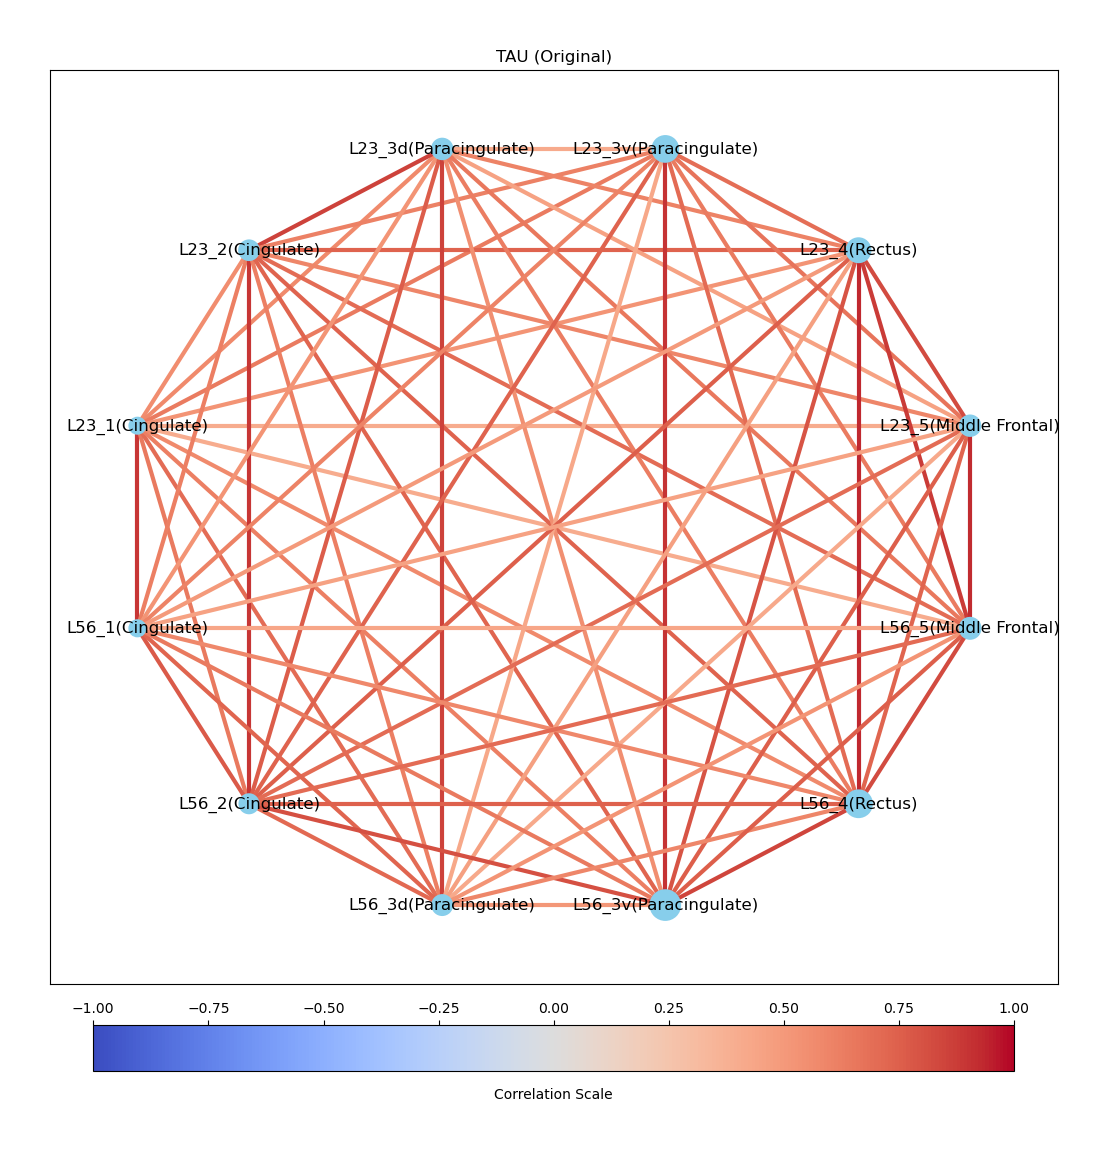

In [12]:
figTAU = cp.chordPlot(cov_dict['TAU'], data_label, f'TAU ({val_type})', fig_type='org', markerVec=markerVecTAU)

## TDP

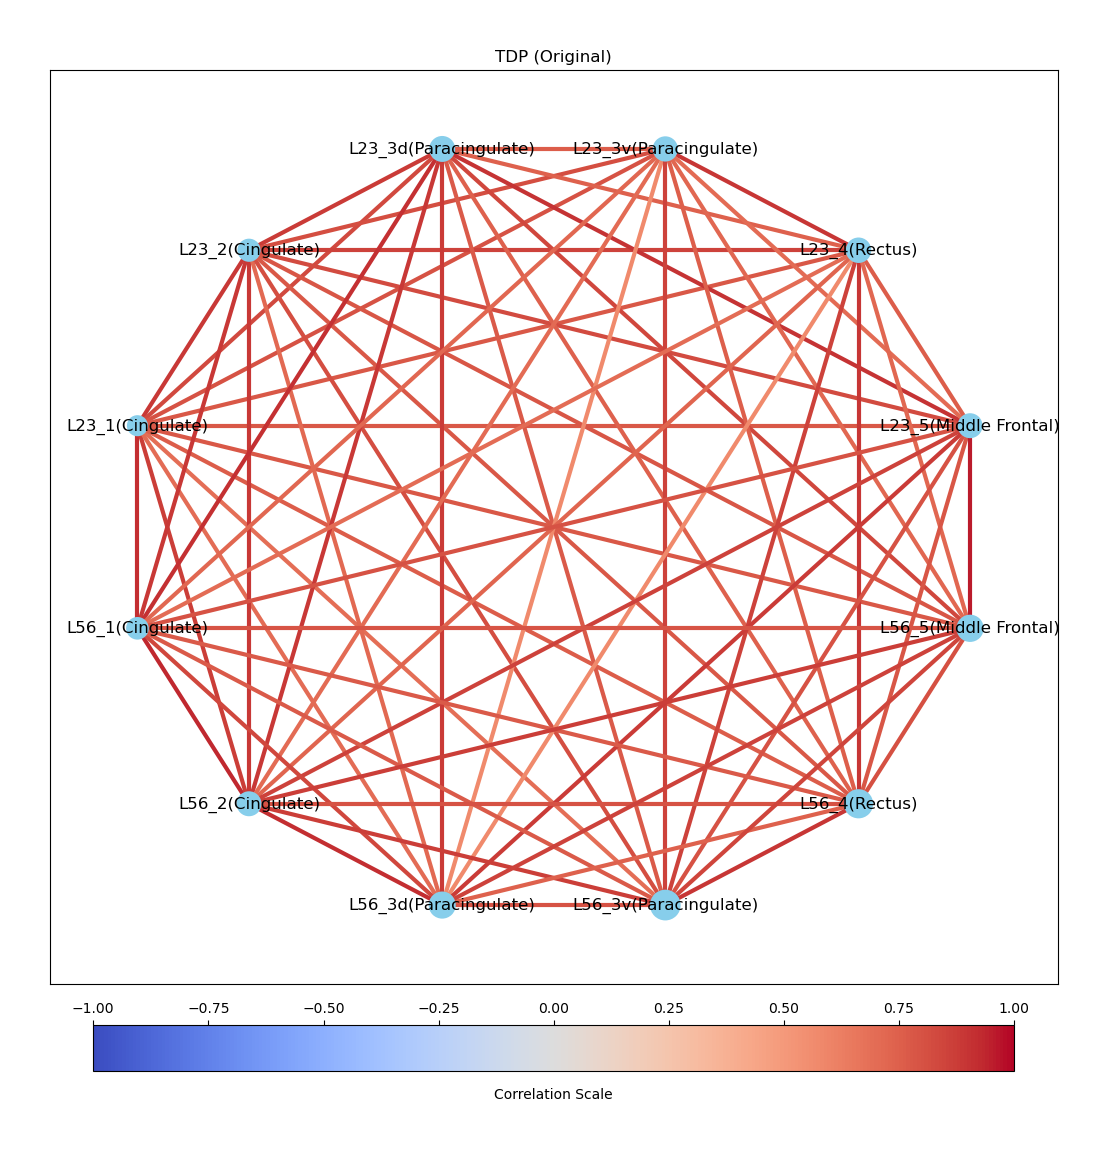

In [13]:
figTDP = cp.chordPlot(cov_dict['TDP'], data_label, f'TDP ({val_type})', fig_type='org', markerVec=markerVecTDP)

## HC > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

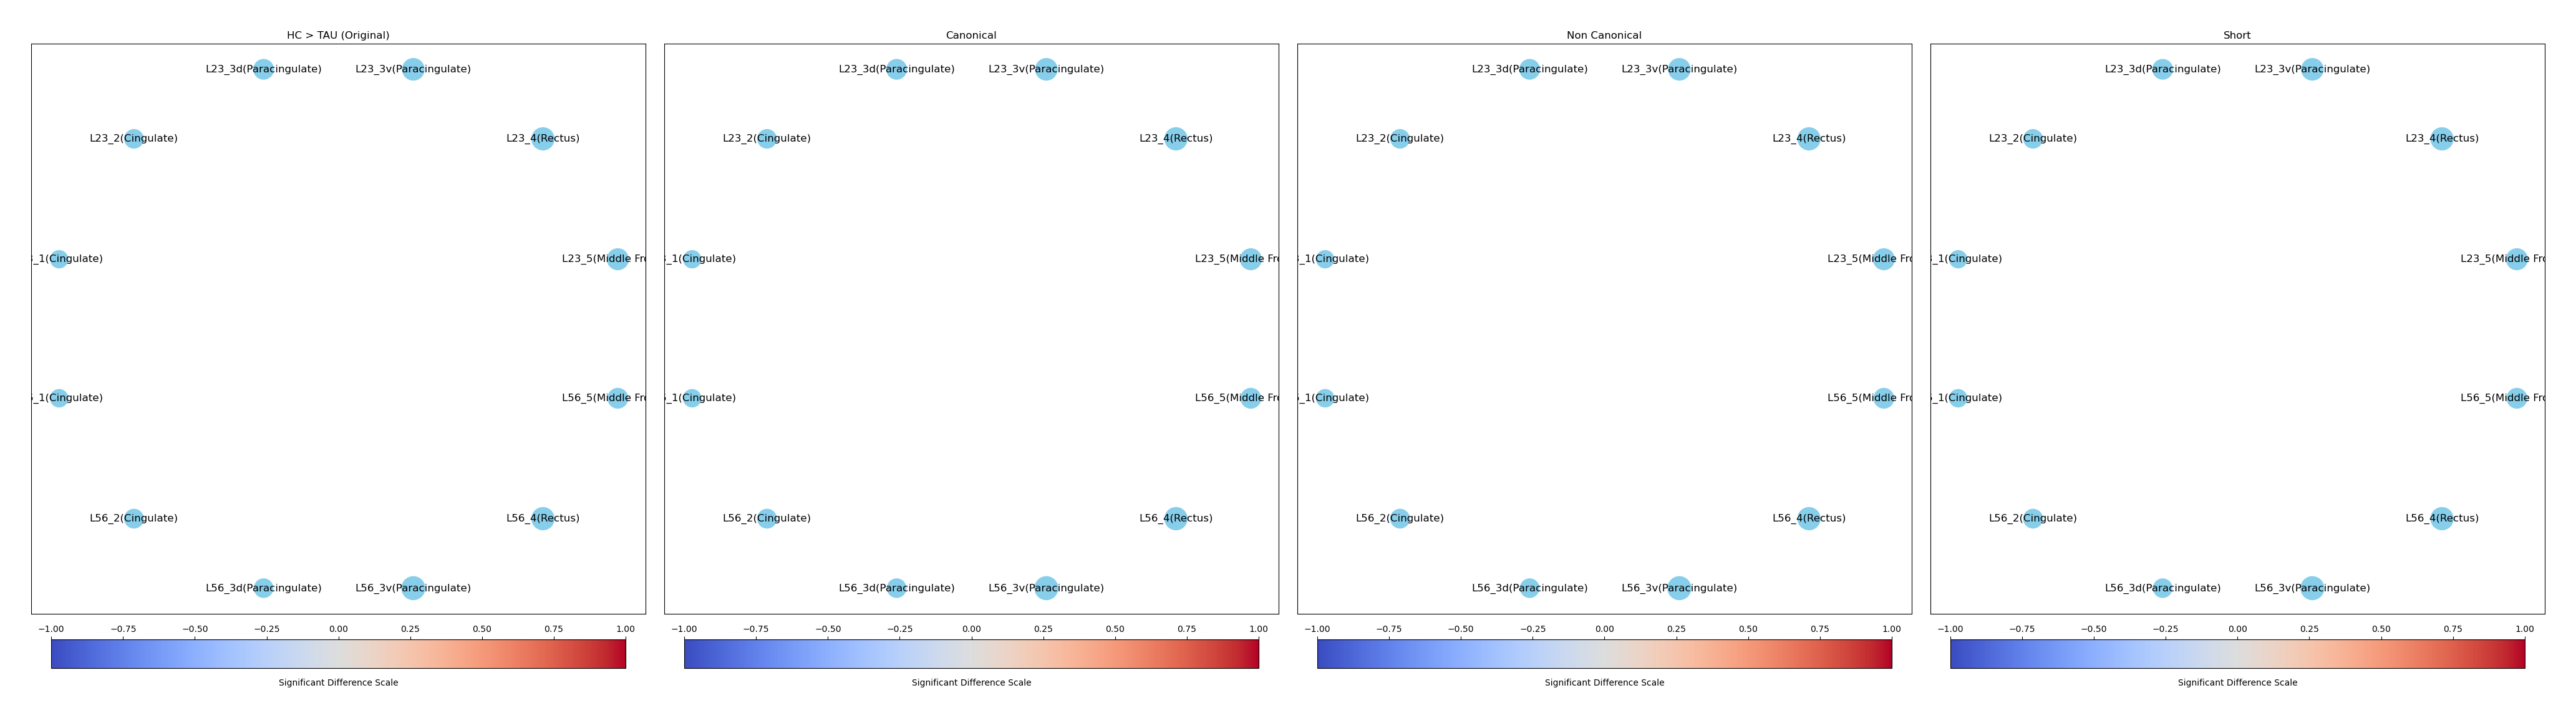

In [14]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlot(cov_dict['TAU_lt_HC'], data_label, f'HC > TAU ({val_type})', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlot(cov_dict['TAU_lt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlot(cov_dict['TAU_lt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlot(cov_dict['TAU_lt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TAU ({val_type}).png')

# Show or save the final concatenated figure
plt.show()



## TAU > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

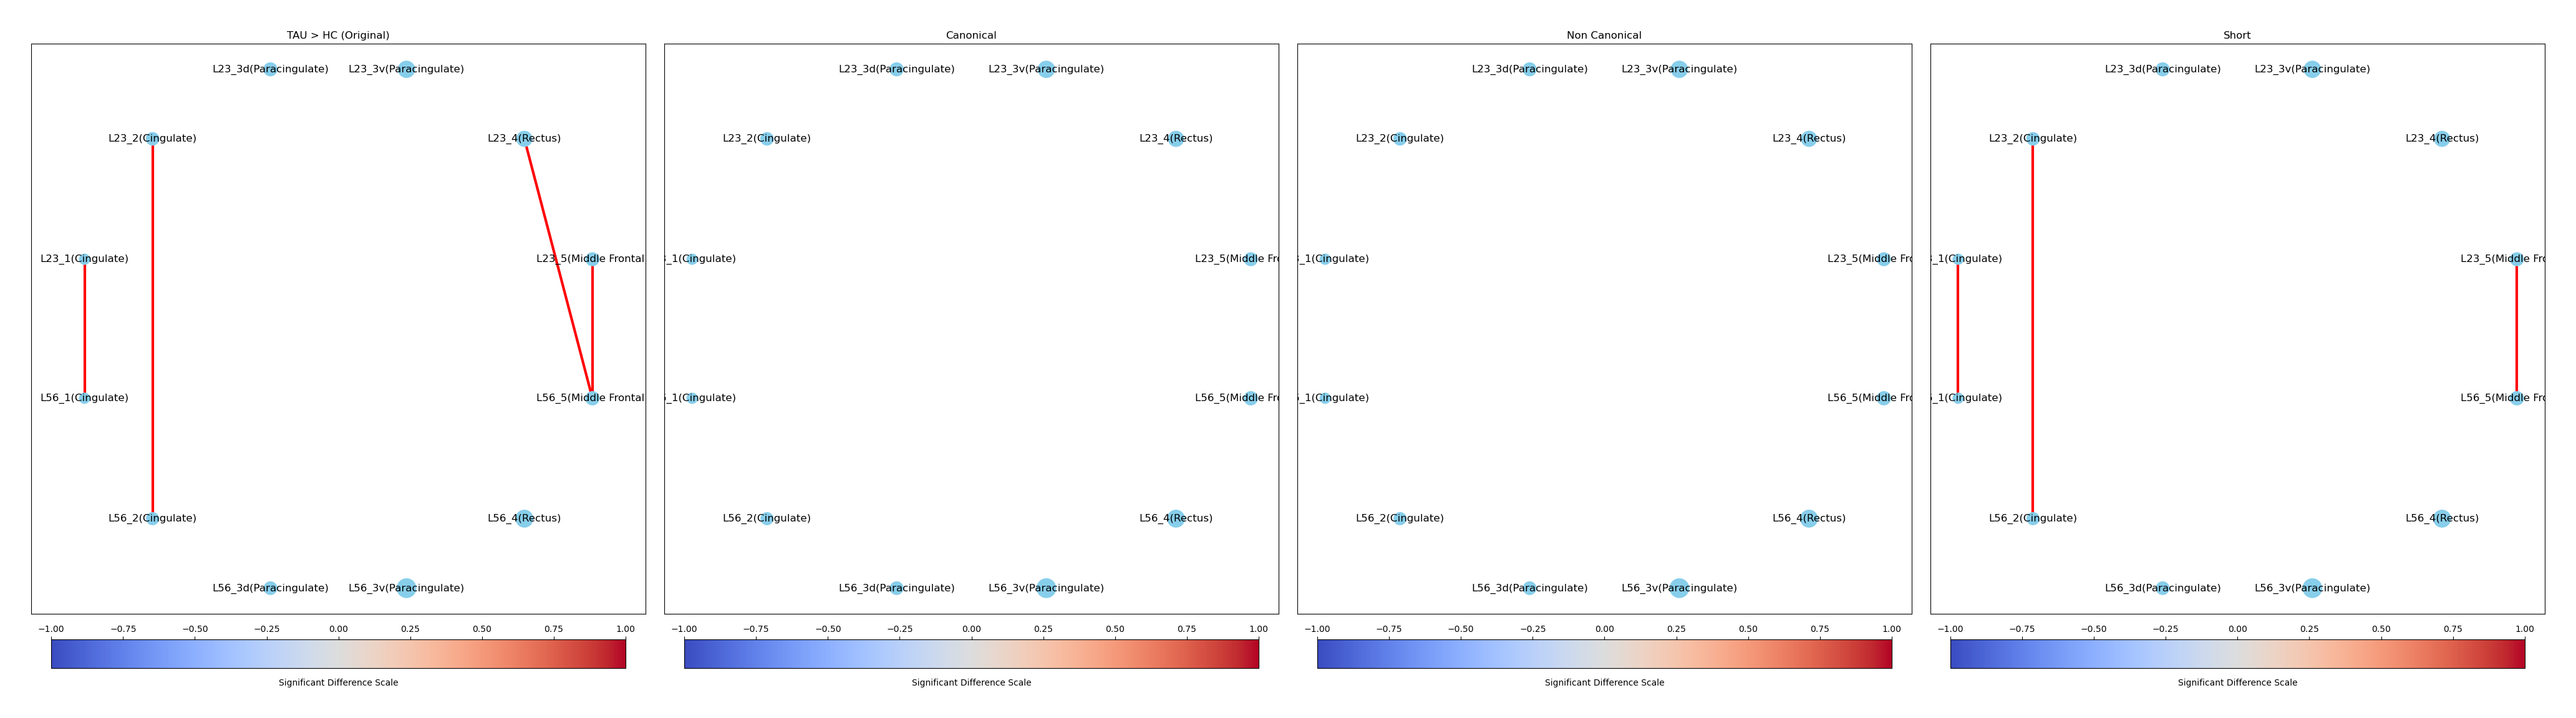

In [15]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlot(cov_dict['TAU_gt_HC'], data_label, f'TAU > HC ({val_type})', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlot(cov_dict['TAU_gt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlot(cov_dict['TAU_gt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlot(cov_dict['TAU_gt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > HC ({val_type}).png')

# Show or save the final concatenated figure
plt.show()

## HC > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

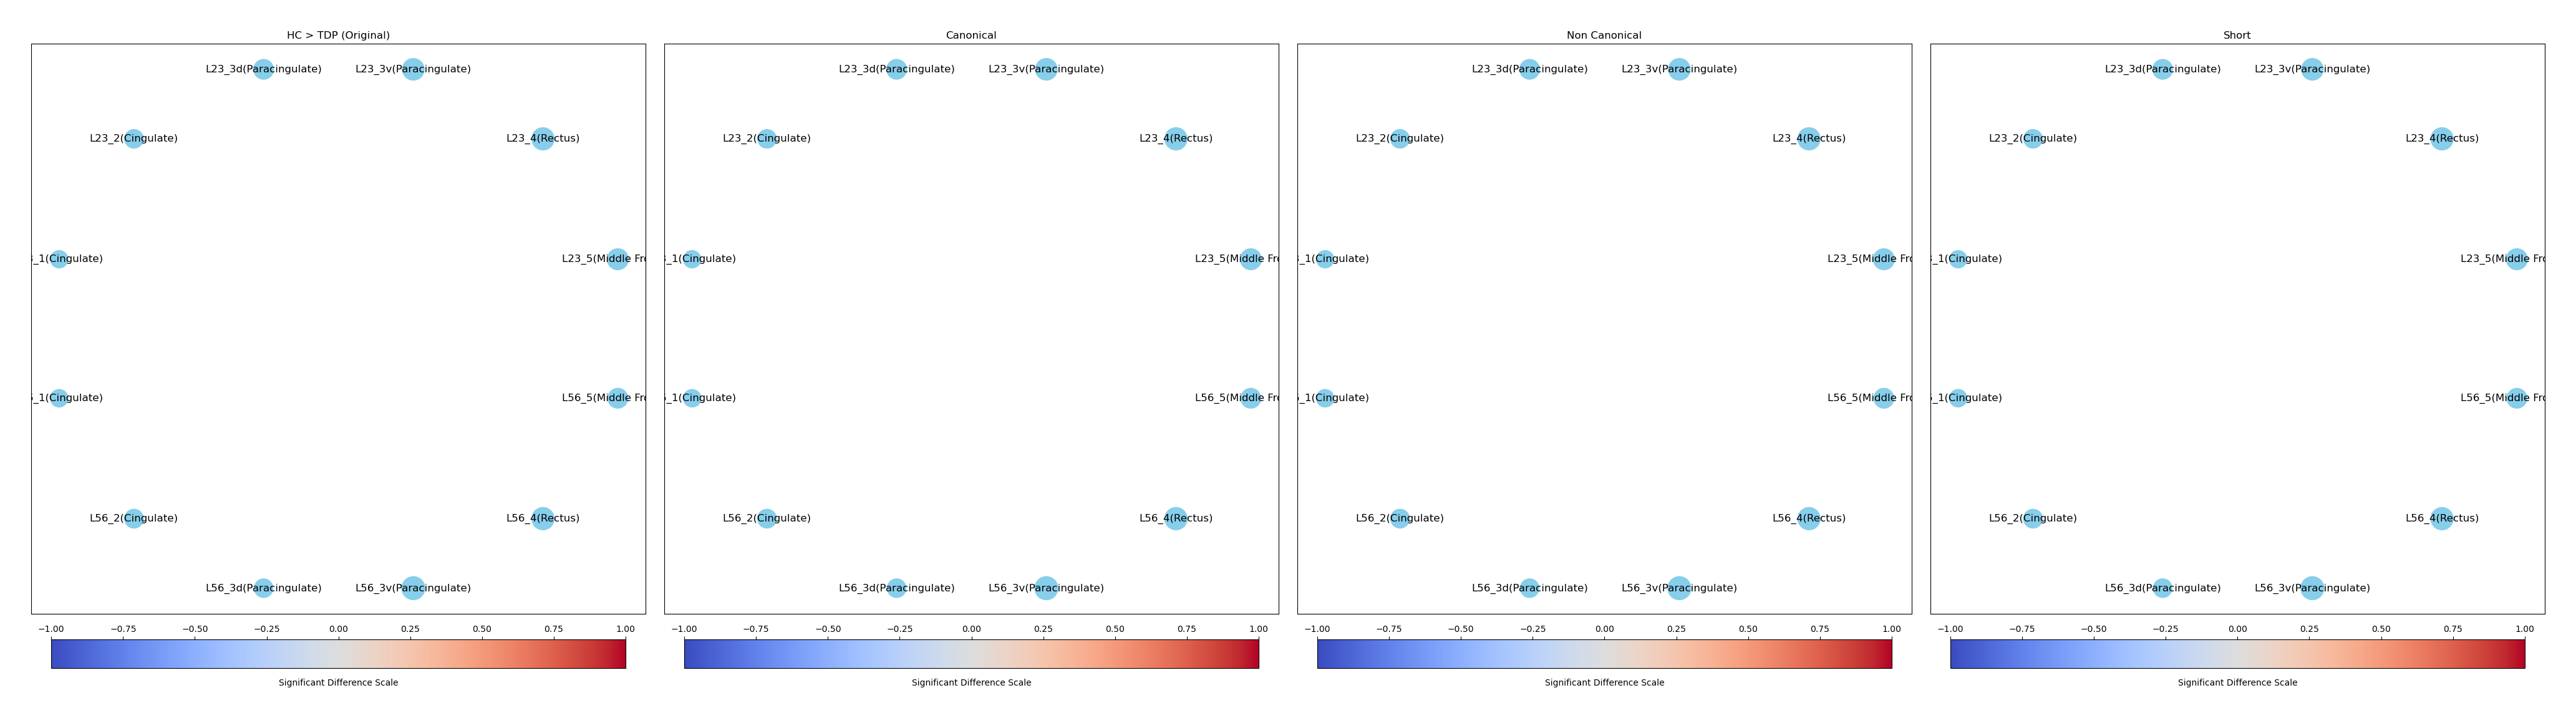

In [16]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlot(cov_dict['TDP_lt_HC'], data_label, f'HC > TDP ({val_type})', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlot(cov_dict['TDP_lt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlot(cov_dict['TDP_lt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlot(cov_dict['TDP_lt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TDP ({val_type}).png')

# Show or save the final concatenated figure
plt.show()

## TDP > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

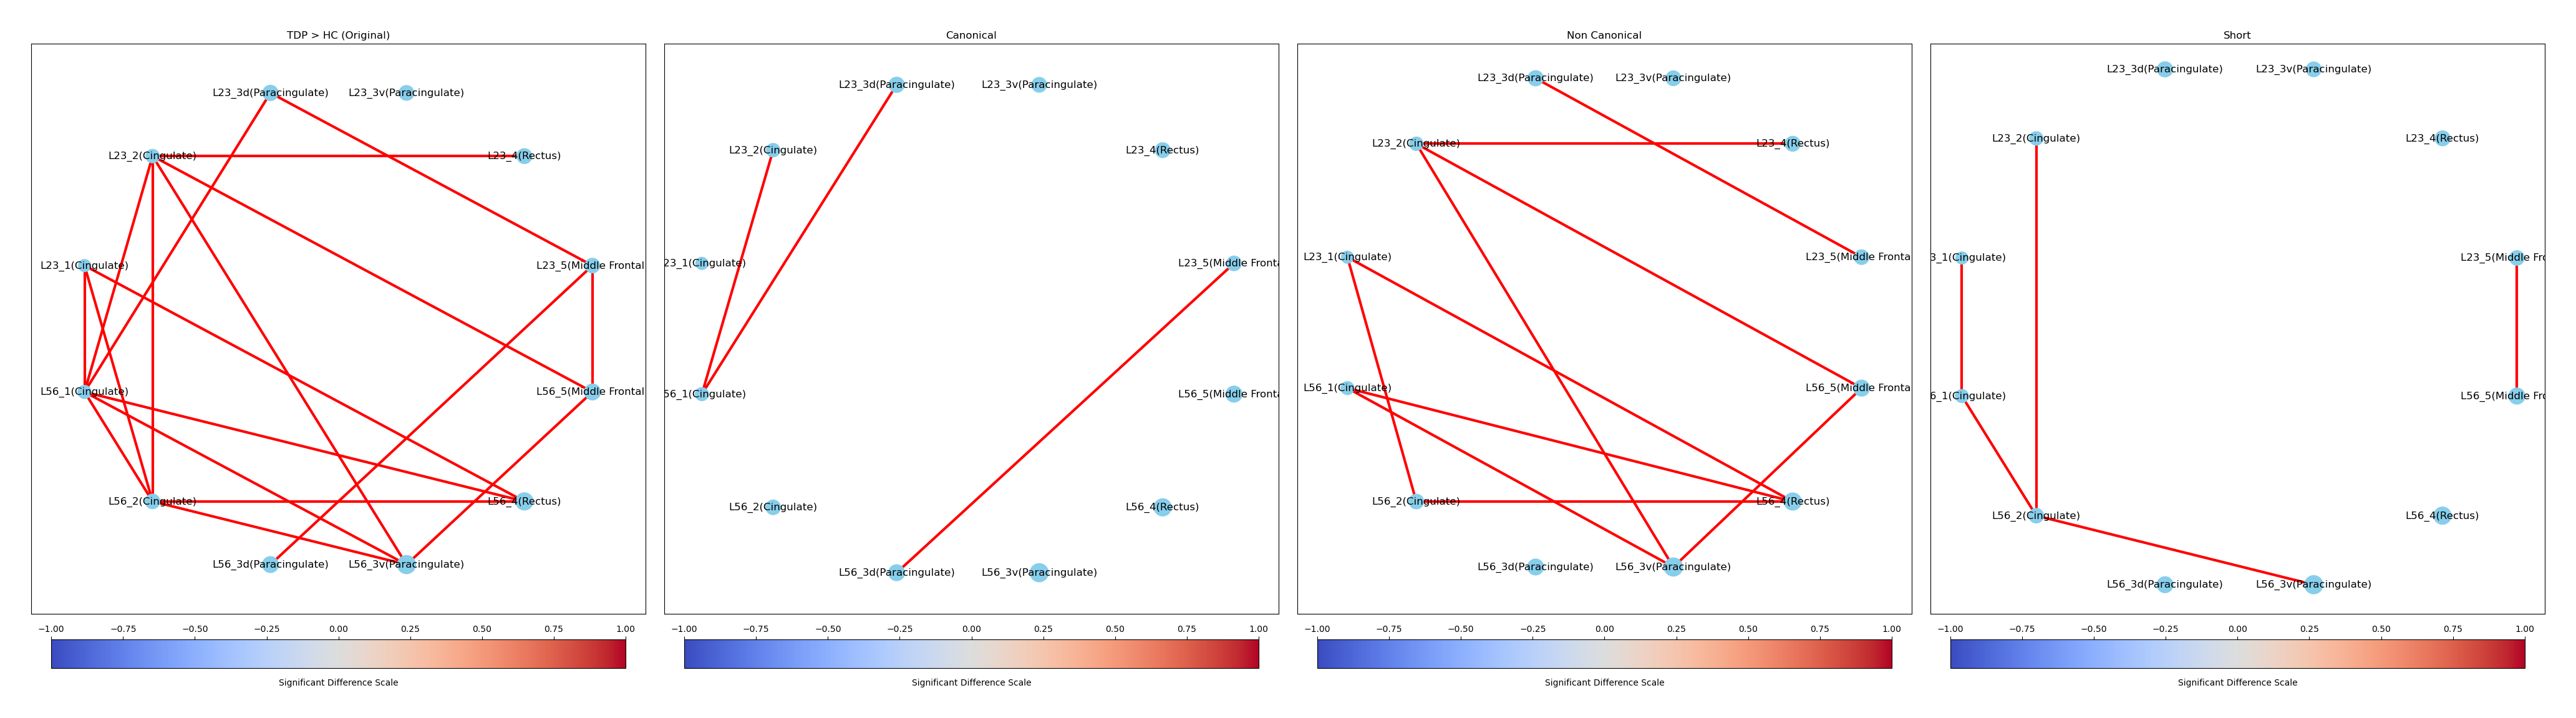

In [17]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlot(cov_dict['TDP_gt_HC'], data_label, f'TDP > HC ({val_type})', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlot(cov_dict['TDP_gt_HC'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlot(cov_dict['TDP_gt_HC'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlot(cov_dict['TDP_gt_HC'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > HC ({val_type}).png')

# Show or save the final concatenated figure
plt.show()

## TAU > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

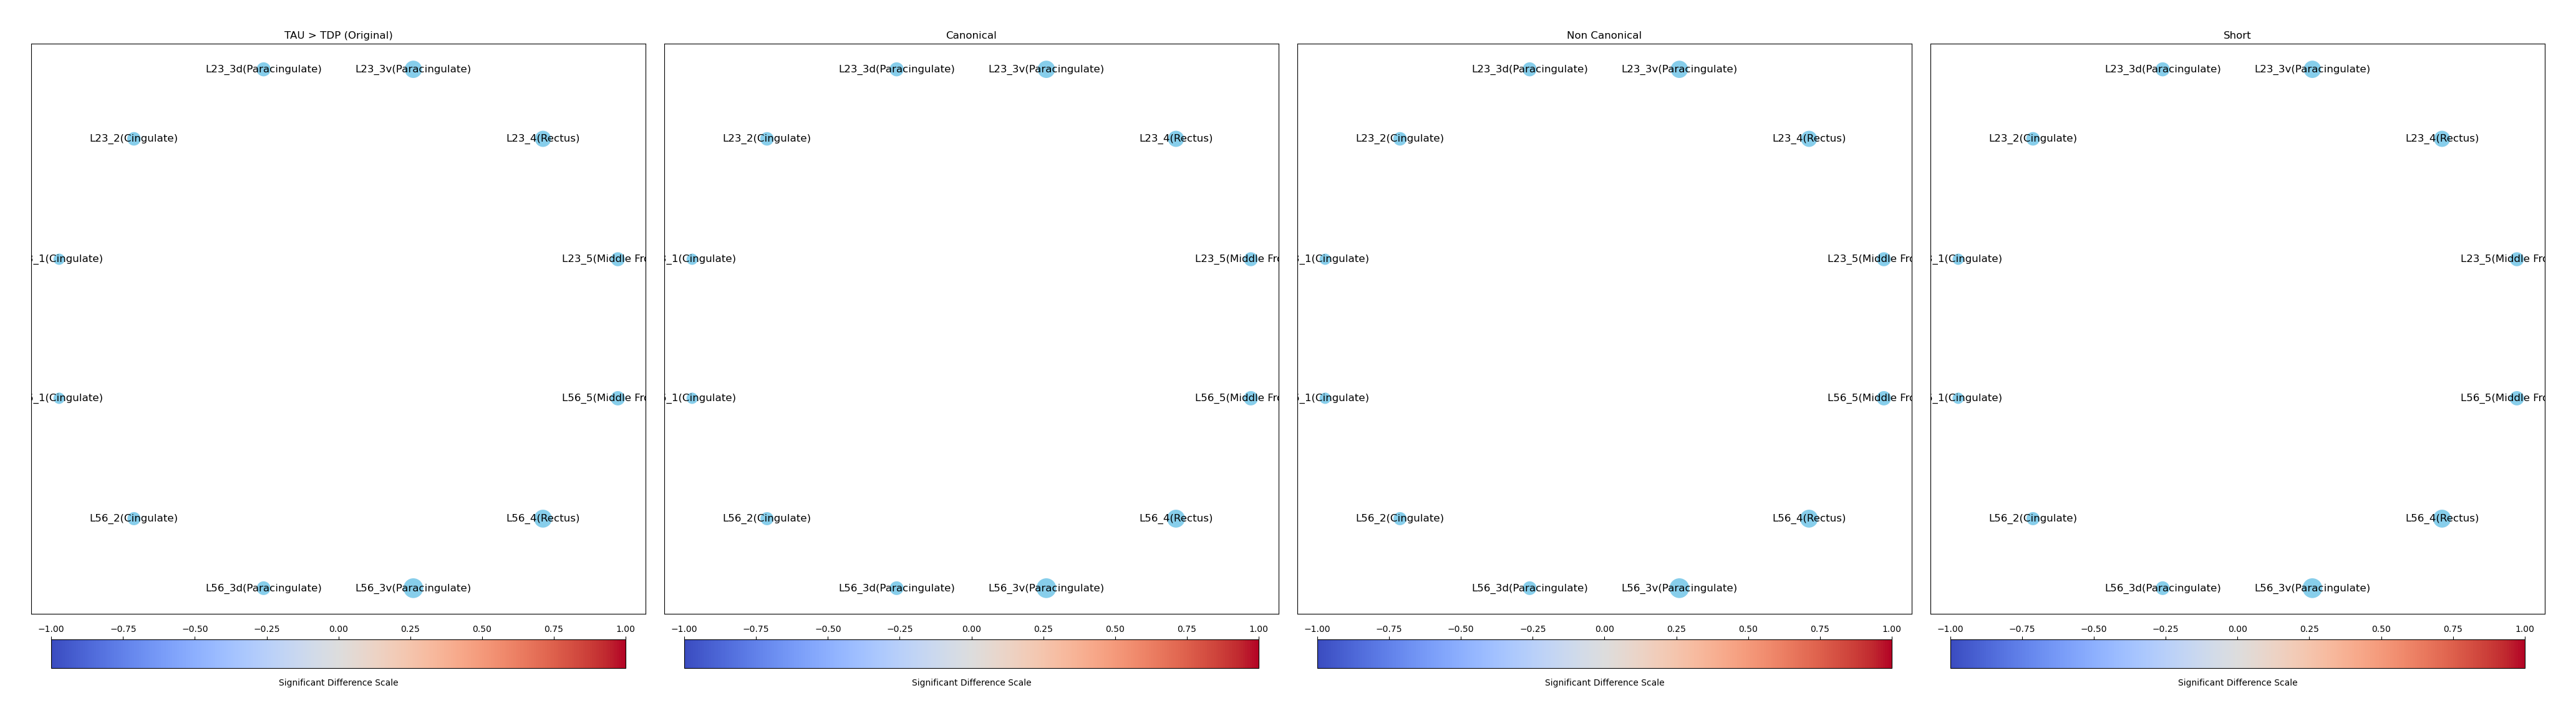

In [18]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlot(cov_dict['TAU_gt_TDP'], data_label, f'TAU > TDP ({val_type})', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlot(cov_dict['TAU_gt_TDP'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > TDP ({val_type}).png')

# Show or save the final concatenated figure
plt.show()

## TDP > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

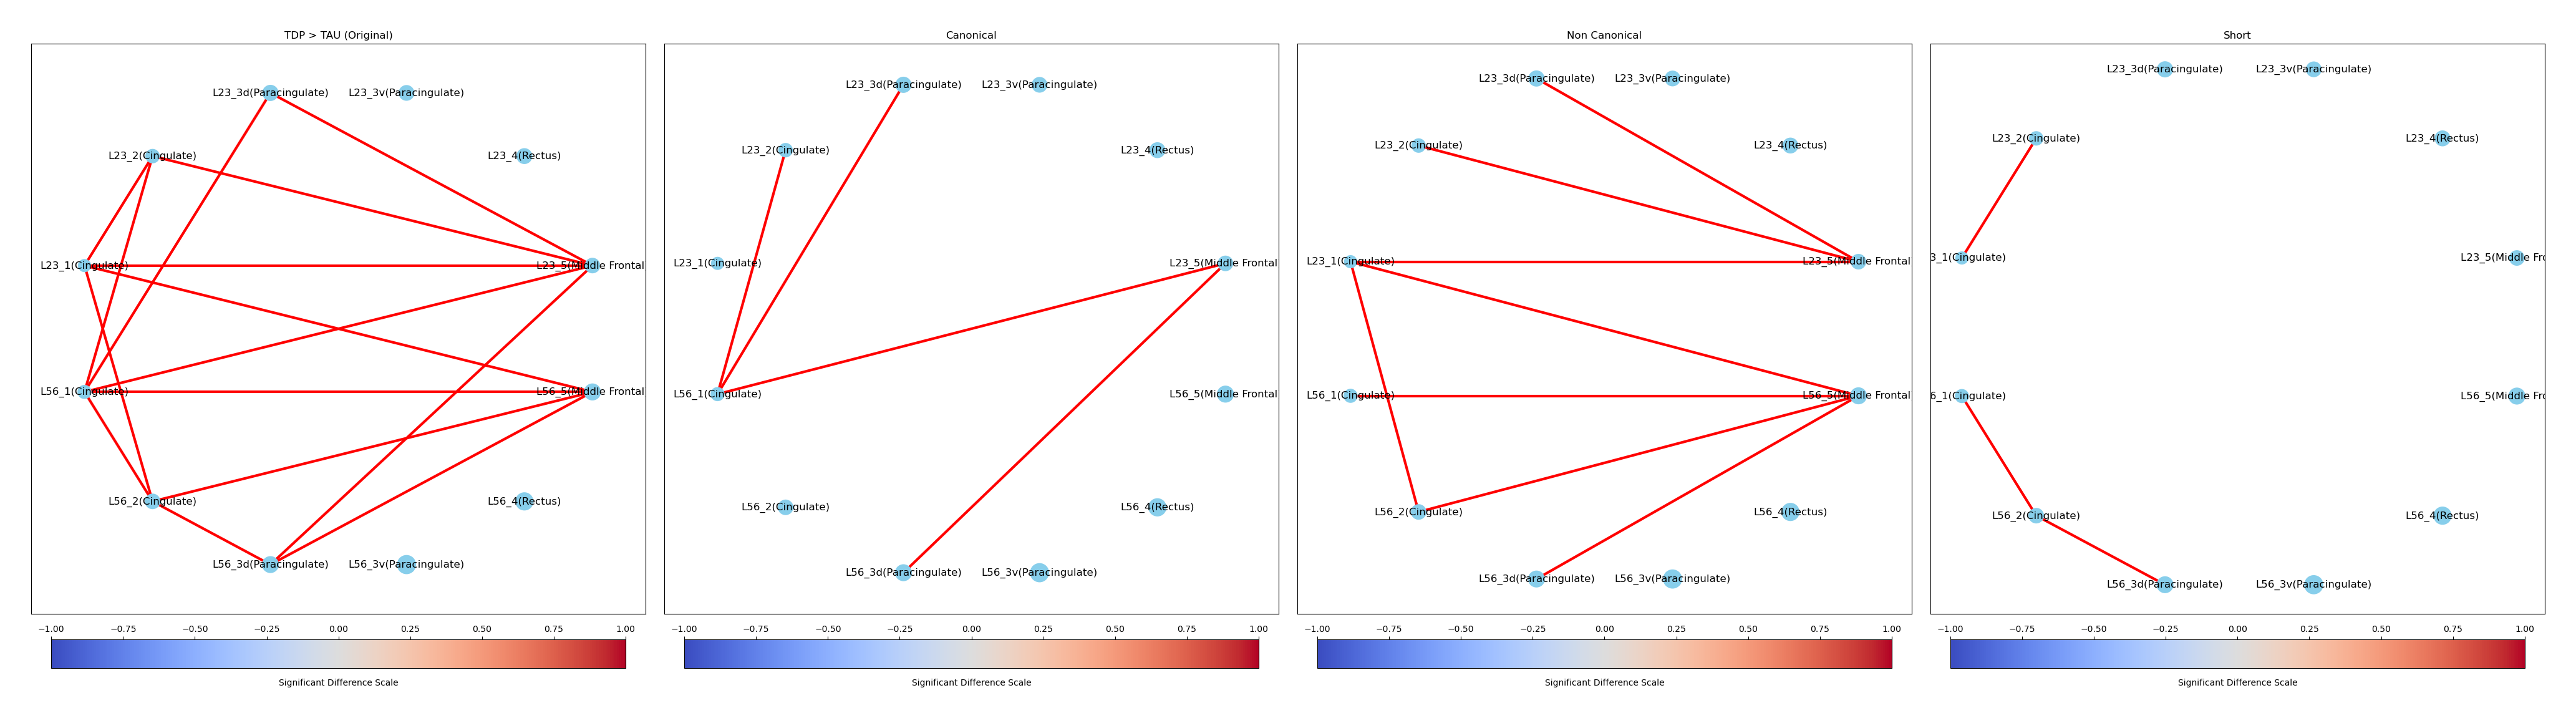

In [19]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlot(cov_dict['TDP_gt_TAU'], data_label, f'TDP > TAU ({val_type})', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlot(cov_dict['TDP_gt_TAU'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > TAU ({val_type}).png')

# Show or save the final concatenated figure
plt.show()